In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier as tree


In [2]:
df=pd.read_csv('Hotel Reservations.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

Text(0.5, 1.0, 'Barplot of booking_status')

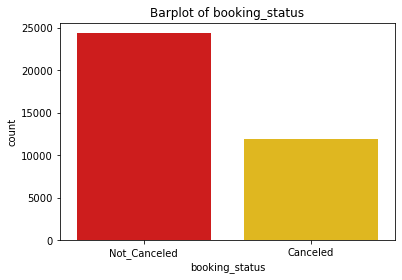

In [8]:
# Bar Plot
sns.countplot(x = 'booking_status', data = df , palette = 'hot')
plt.title('Barplot of booking_status')


In [9]:
df['booking_status']=df['booking_status'].astype('category').cat.codes

In [10]:
df.booking_status.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [11]:
df = df.drop(['Booking_ID'], axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [13]:
df.no_of_adults.value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_adults')

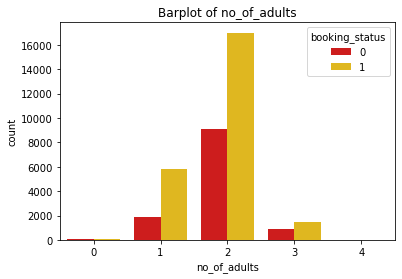

In [14]:
# Bar Plot
sns.countplot(x = 'no_of_adults', hue='booking_status', data = df , palette = 'hot')
plt.title('Barplot of no_of_adults')

In [15]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.no_of_adults, df.booking_status)
chi2_contingency(ct_house, correction = False)
# p_val = 3.8e-7, Ho reject, hence association exists, good predictor 

(339.16395984885366,
 3.831907699242197e-72,
 4,
 array([[4.55414197e+01, 9.34585803e+01],
        [2.52115989e+03, 5.17384011e+03],
        [8.55392364e+03, 1.75540764e+04],
        [7.59132874e+02, 1.55786713e+03],
        [5.24217781e+00, 1.07578222e+01]]))

In [16]:
round(3.831907699242197e-72,4)

0.0

In [17]:
df.no_of_children.value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_children')

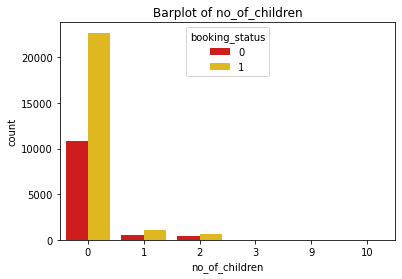

In [18]:
# Bar Plot
sns.countplot(x = 'no_of_children',hue='booking_status', data = df , palette = 'hot')
plt.title('Barplot of no_of_children')

In [19]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.no_of_children)
chi2_contingency(ct_house, correction = False)
# p_val = 9.99-e, Ho reject, hence association exists, good predictor

(55.563035490733476,
 9.996981480354703e-11,
 5,
 array([[1.10010378e+04, 5.30115231e+02, 3.46639008e+02, 6.22508615e+00,
         6.55272226e-01, 3.27636113e-01],
        [2.25759622e+04, 1.08788477e+03, 7.11360992e+02, 1.27749139e+01,
         1.34472777e+00, 6.72363887e-01]]))

In [20]:
round(9.996981480354703e-11,4)

0.0

In [21]:
df.no_of_weekend_nights.value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_weekend_nights')

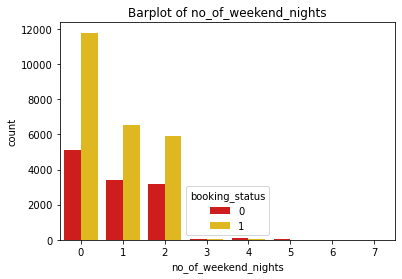

In [22]:
sns.countplot(x='no_of_weekend_nights', hue='booking_status',data=df,palette='hot')
plt.title('Barplot of no_of_weekend_nights')

In [23]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.no_of_weekend_nights)
chi2_contingency(ct_house, correction = False)
# p_val = 9.99-e, Ho reject, hence association exists, good predictor

(219.4451795316278,
 8.652980406070009e-44,
 7,
 array([[5.52787650e+03, 3.27472295e+03, 2.97198718e+03, 5.01283253e+01,
         4.22650586e+01, 1.11396278e+01, 6.55272226e+00, 3.27636113e-01],
        [1.13441235e+04, 6.72027705e+03, 6.09901282e+03, 1.02871675e+02,
         8.67349414e+01, 2.28603722e+01, 1.34472777e+01, 6.72363887e-01]]))

In [24]:
round(8.652980406070009e-44,4)

0.0

In [25]:
df.no_of_week_nights.value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_week_nights')

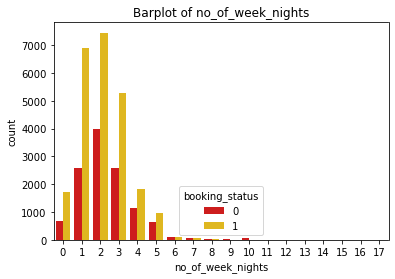

In [26]:
sns.countplot(x='no_of_week_nights', hue='booking_status',data=df,palette='hot')
plt.title('Barplot of no_of_week_nights')

In [27]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.no_of_week_nights)
chi2_contingency(ct_house, correction = False)
# p_val = 9.99-e, Ho reject, hence association exists, good predictor

(434.5183836997645,
 1.0986460902695565e-81,
 17,
 array([[7.82067402e+02, 3.10861144e+03, 3.74946768e+03, 2.56833949e+03,
         9.79631978e+02, 5.28804686e+02, 6.19232254e+01, 3.70228808e+01,
         2.03134390e+01, 1.11396278e+01, 2.03134390e+01, 5.56981392e+00,
         2.94872502e+00, 1.63818057e+00, 2.29345279e+00, 3.27636113e+00,
         6.55272226e-01, 9.82908339e-01],
        [1.60493260e+03, 6.37938856e+03, 7.69453232e+03, 5.27066051e+03,
         2.01036802e+03, 1.08519531e+03, 1.27076775e+02, 7.59771192e+01,
         4.16865610e+01, 2.28603722e+01, 4.16865610e+01, 1.14301861e+01,
         6.05127498e+00, 3.36181943e+00, 4.70654721e+00, 6.72363887e+00,
         1.34472777e+00, 2.01709166e+00]]))

In [28]:
round(1.0986460902695565e-81,4)

0.0

In [29]:
df.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Text(0.5, 1.0, 'Barplot of type_of_meal_plan')

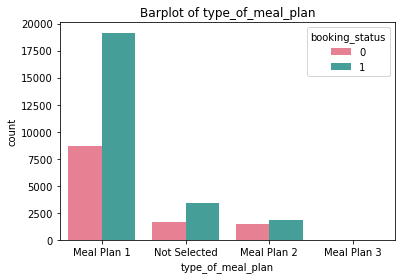

In [30]:
sns.countplot(x='type_of_meal_plan', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of type_of_meal_plan')

In [31]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.type_of_meal_plan)
chi2_contingency(ct_house, correction = False)

(278.29490920586017,
 4.951915406087789e-60,
 3,
 array([[9.11975121e+03, 1.08283735e+03, 1.63818057e+00, 1.68077326e+03],
        [1.87152488e+04, 2.22216265e+03, 3.36181943e+00, 3.44922674e+03]]))

In [32]:
round(4.951915406087789e-60,4)

0.0

In [33]:
df.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [34]:
#Converting to numeric/ integer
df['type_of_meal_plan']=df.get('type_of_meal_plan').replace('Meal Plan 1', 1)
df['type_of_meal_plan']=df.get('type_of_meal_plan').replace('Meal Plan 2', 2)
df['type_of_meal_plan']=df.get('type_of_meal_plan').replace('Meal Plan 3', 3)
df['type_of_meal_plan']=df.get('type_of_meal_plan').replace('Not Selected', 0)

In [35]:
df.type_of_meal_plan.value_counts()

1    27835
0     5130
2     3305
3        5
Name: type_of_meal_plan, dtype: int64

In [36]:
df.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

Text(0.5, 1.0, 'Barplot of required_car_parking_space')

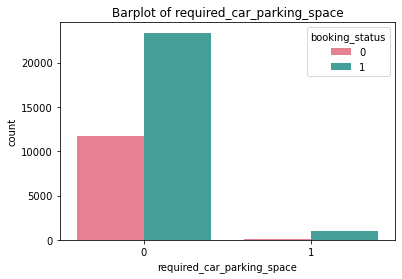

In [37]:
sns.countplot(x='required_car_parking_space', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of required_car_parking_space')

In [38]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.required_car_parking_space)
chi2_contingency(ct_house, correction = False)

(269.44714368539746,
 1.4976223934666923e-60,
 1,
 array([[11516.73700896,   368.26299104],
        [23634.26299104,   755.73700896]]))

In [39]:
round(1.4976223934666923e-60,4)

0.0

In [40]:
df.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [41]:
# Cat codes
df['room_type_reserved']=df['room_type_reserved'].astype('category').cat.codes

In [42]:
df.room_type_reserved.value_counts()

0    28130
3     6057
5      966
1      692
4      265
6      158
2        7
Name: room_type_reserved, dtype: int64

In [43]:
df.room_type_reserved.unique()

array([0, 3, 1, 5, 4, 6, 2], dtype=int8)

Text(0.5, 1.0, 'Barplot of required_car_parking_space')

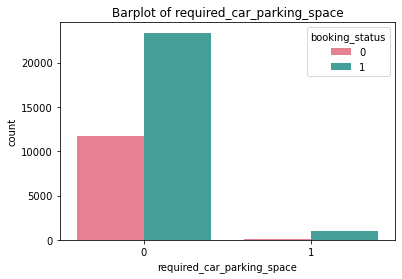

In [44]:
sns.countplot(x='required_car_parking_space', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of required_car_parking_space')

In [45]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.required_car_parking_space)
chi2_contingency(ct_house, correction = False)

(269.44714368539746,
 1.4976223934666923e-60,
 1,
 array([[11516.73700896,   368.26299104],
        [23634.26299104,   755.73700896]]))

In [46]:
round(1.4976223934666923e-60,4)

0.0

In [47]:
df.room_type_reserved.value_counts()

0    28130
3     6057
5      966
1      692
4      265
6      158
2        7
Name: room_type_reserved, dtype: int64

In [48]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.room_type_reserved, df.booking_status)
chi2_contingency(ct_house, correction = False)

(57.33495179790707,
 1.5627796772447482e-10,
 6,
 array([[9.21640386e+03, 1.89135961e+04],
        [2.26724190e+02, 4.65275810e+02],
        [2.29345279e+00, 4.70654721e+00],
        [1.98449194e+03, 4.07250806e+03],
        [8.68235700e+01, 1.78176430e+02],
        [3.16496485e+02, 6.49503515e+02],
        [5.17665059e+01, 1.06233494e+02]]))

In [49]:
round(3.200747354734445e-15,4)

0.0

In [50]:
df.lead_time.value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


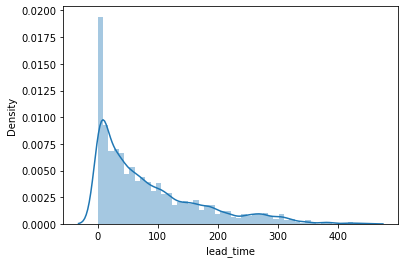

In [51]:

#______histogram

sns.distplot(df['lead_time'])
plt.show()

<AxesSubplot:xlabel='lead_time'>

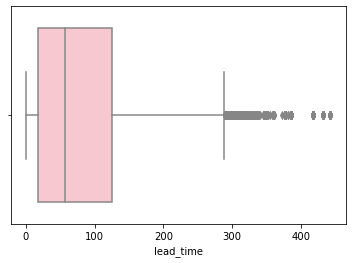

In [52]:
sns.boxplot(data=df, x='lead_time', color='pink')

In [53]:
#Checking outliners, LT is lead_time
LT_IQR = df.lead_time.describe()['75%']-df.lead_time.describe()['25%']
LT_uplim = df.lead_time.describe()['75%']+1.5*LT_IQR
#RH_lolim = df.RH.describe()['25%']-1.5*RH_IQR
#len(df.AP[df.AP > AP_uplim]) #72 outliers
len(df.lead_time[df.lead_time > LT_uplim])

1331

In [54]:
df.lead_time = np.where(df.lead_time>LT_uplim,LT_uplim,df.lead_time)

<AxesSubplot:xlabel='lead_time'>

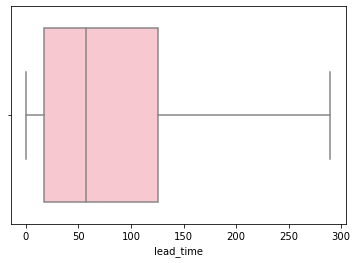

In [55]:
sns.boxplot(data=df, x='lead_time', color='pink')

In [56]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [57]:
df.arrival_year.value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

Text(0.5, 1.0, 'Barplot of arrival_year')

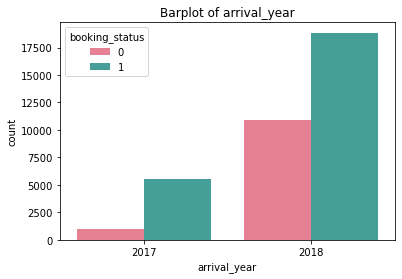

In [58]:
sns.countplot(x='arrival_year', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of arrival_year')

In [59]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.arrival_year)
chi2_contingency(ct_house, correction = False)

(1169.1658803091102,
 3.065393311072013e-256,
 1,
 array([[ 2134.22164025,  9750.77835975],
        [ 4379.77835975, 20010.22164025]]))

In [60]:
round(3.065393311072013e-256,4)

0.0

In [61]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [62]:
df.arrival_month.value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

Text(0.5, 1.0, 'Barplot of arrival_month')

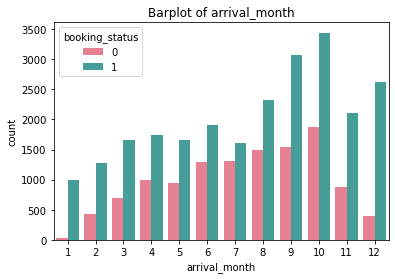

In [63]:
sns.countplot(x='arrival_month', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of arrival_month')

In [64]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.arrival_month)
chi2_contingency(ct_house, correction = False)

(1412.5959854252537,
 2.3069606491549355e-296,
 11,
 array([[ 332.22301861,  558.2919366 ,  772.56595451,  896.41240524,
          851.19862164, 1049.41847002,  956.69745003, 1249.27649897,
         1510.73011716, 1742.04121296,  976.35561682,  989.78869745],
        [ 681.77698139, 1145.7080634 , 1585.43404549, 1839.58759476,
         1746.80137836, 2153.58152998, 1963.30254997, 2563.72350103,
         3100.26988284, 3574.95878704, 2003.64438318, 2031.21130255]]))

In [65]:
round(2.3069606491549355e-296,4)

0.0

In [66]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [67]:
df.arrival_date.value_counts()

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

Text(0.5, 1.0, 'Barplot of arrival_month')

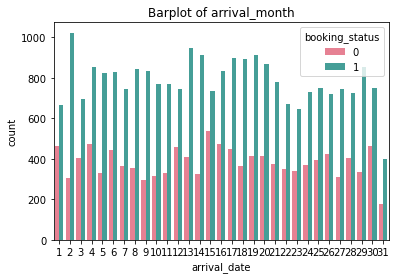

In [68]:
sns.countplot(x='arrival_date', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of arrival_month')

In [69]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.arrival_date)
chi2_contingency(ct_house, correction = False)

(321.6444289783148,
 1.3915931305634915e-50,
 30,
 array([[371.21171606, 436.08366644, 359.7444521 , 434.77312198,
         378.09207443, 417.08077188, 363.67608546, 392.5080634 ,
         370.22880772, 356.79572708, 359.7444521 , 394.47388008,
         444.92984149, 406.92405238, 417.08077188, 427.89276361,
         440.67057202, 412.82150241, 434.77312198, 419.70186079,
         379.40261888, 335.17174363, 324.3597519 , 361.38263267,
         375.47098553, 375.47098553, 346.96664369, 369.90117161,
         389.8869745 , 398.40551344, 189.37367333],
        [761.78828394, 894.91633356, 738.2555479 , 892.22687802,
         775.90792557, 855.91922812, 746.32391454, 805.4919366 ,
         759.77119228, 732.20427292, 738.2555479 , 809.52611992,
         913.07015851, 835.07594762, 855.91922812, 878.10723639,
         904.32942798, 847.17849759, 892.22687802, 861.29813921,
         778.59738112, 687.82825637, 665.6402481 , 741.61736733,
         770.52901447, 770.52901447, 712.03335631, 75

In [70]:
round(1.3915931305634915e-50,4)

0.0

In [71]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [72]:
df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [73]:
# Cat codes
df['market_segment_type']=df['market_segment_type'].astype('category').cat.codes

In [74]:
df.market_segment_type.value_counts()

4    23214
3    10528
2     2017
1      391
0      125
Name: market_segment_type, dtype: int64

Text(0.5, 1.0, 'Barplot of market_segment')

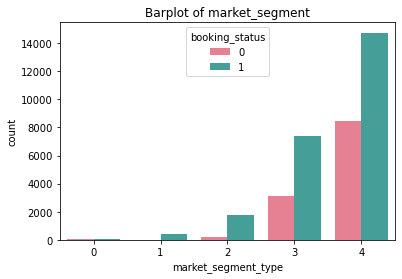

In [75]:
sns.countplot(x='market_segment_type', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of market_segment')

In [76]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.market_segment_type)
chi2_contingency(ct_house, correction = False)

(814.1088652405568,
 6.74876302455762e-175,
 4,
 array([[   40.95451413,   128.10572019,   660.84203997,  3449.35299793,
          7605.74472777],
        [   84.04548587,   262.89427981,  1356.15796003,  7078.64700207,
         15608.25527223]]))

In [77]:
round(6.74876302455762e-175,4)

0.0

In [78]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [79]:
df.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

Text(0.5, 1.0, 'Barplot of repeated_guest')

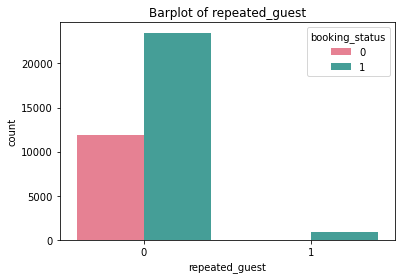

In [80]:
sns.countplot(x='repeated_guest', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of repeated_guest')

In [81]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.repeated_guest)
chi2_contingency(ct_house, correction = False)

(417.540569427854,
 8.370937808836557e-93,
 1,
 array([[11580.29841489,   304.70158511],
        [23764.70158511,   625.29841489]]))

In [82]:
round(8.370937808836557e-93,4)

0.0

In [83]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [84]:
df.no_of_previous_cancellations.value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_previous_cancellations')

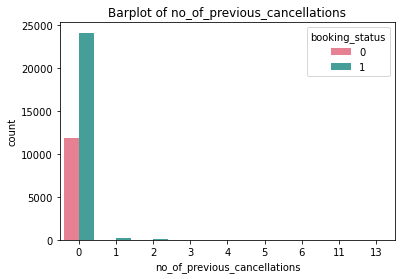

In [85]:
sns.countplot(x='no_of_previous_cancellations', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of no_of_previous_cancellations')

In [86]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.no_of_previous_cancellations)
chi2_contingency(ct_house, correction = False)

(139.2820121236975,
 3.3464027245396504e-26,
 8,
 array([[1.17742590e+04, 6.48719504e+01, 1.50712612e+01, 1.40883529e+01,
         3.27636113e+00, 3.60399724e+00, 3.27636113e-01, 8.19090283e+00,
         1.31054445e+00],
        [2.41627410e+04, 1.33128050e+02, 3.09287388e+01, 2.89116471e+01,
         6.72363887e+00, 7.39600276e+00, 6.72363887e-01, 1.68090972e+01,
         2.68945555e+00]]))

In [87]:
round(3.3464027245396504e-26,4)

0.0

In [88]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [89]:
df.avg_price_per_room.value_counts()

65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


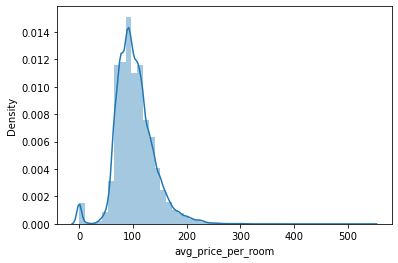

In [90]:
sns.distplot(df['avg_price_per_room'])
plt.show()

<AxesSubplot:xlabel='avg_price_per_room'>

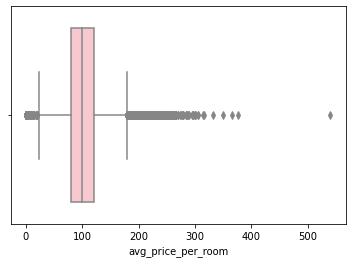

In [91]:
sns.boxplot(data=df, x='avg_price_per_room', color='pink')

In [92]:
IQR = df.avg_price_per_room.describe()['75%']-df.avg_price_per_room.describe()['25%']
uplim = df.avg_price_per_room.describe()['75%']+1.5*IQR
lolim = df.avg_price_per_room.describe()['25%']-1.5*IQR
print(len(df.avg_price_per_room[df.avg_price_per_room > uplim]))#1069
print(len(df.avg_price_per_room[df.avg_price_per_room<lolim]))#627

1069
627


In [93]:
df.avg_price_per_room = np.where(df.avg_price_per_room>uplim,uplim,df.avg_price_per_room)
df.avg_price_per_room = np.where(df.avg_price_per_room<lolim,lolim,df.avg_price_per_room)

<AxesSubplot:xlabel='avg_price_per_room'>

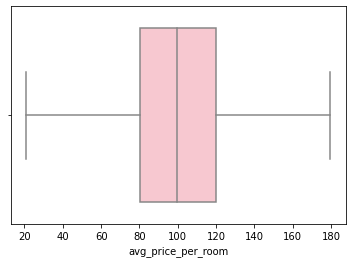

In [94]:
sns.boxplot(data=df, x='avg_price_per_room', color='pink')

In [95]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [96]:
df.no_of_special_requests.value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

Text(0.5, 1.0, 'Barplot of no_of_special_requests')

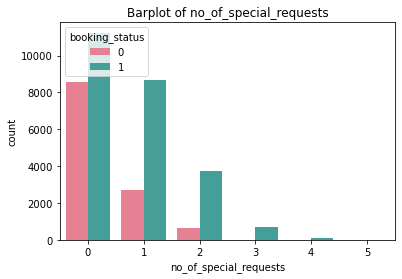

In [97]:
sns.countplot(x='no_of_special_requests', hue='booking_status',data=df,palette='husl')
plt.title('Barplot of no_of_special_requests')

In [98]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df.booking_status, df.no_of_special_requests)
chi2_contingency(ct_house, correction = False)

(2421.6187208019905,
 0.0,
 5,
 array([[6.47965941e+03, 3.72620551e+03, 1.42980400e+03, 2.21154376e+02,
         2.55556168e+01, 2.62108890e+00],
        [1.32973406e+04, 7.64679449e+03, 2.93419600e+03, 4.53845624e+02,
         5.24443832e+01, 5.37891110e+00]]))

In [99]:
#_______________VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [100]:
# first put your predictors in x
x = df.iloc[:, [7,15]] # x is a data frame


In [101]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data) # two columns, feature & VIF will appear

              feature       VIF
0           lead_time  1.820821
1  avg_price_per_room  1.820821


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int8   
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [103]:
#TRAIN TEST SPLIT
# X and y
X = df.loc[:, df.columns != 'booking_status']
y = df.loc[:, df.columns == 'booking_status']

In [104]:
# solver = liblinear

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(X, y)
model1.intercept_
model1.coef_

C:\Users\syeda\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.01343492, -0.03404544, -0.1476195 , -0.04499729,  0.31380533,
         1.35628471,  0.08523617, -0.01539686,  0.00363172,  0.06231517,
        -0.00347422, -1.12018245,  0.2243538 , -0.03986576,  0.14637354,
        -0.02233788,  1.35833381]])

In [105]:
#Predictions
y_pred = model1.predict(X)

In [106]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_pred)
print(cm)

[[ 7273  4612]
 [ 2661 21729]]


In [107]:
#Accuracy Score - correct predictions / total number of data points
model1.score(X,y) #.0.80


0.7995037904893177

In [108]:
print((7260+21762)/(7260+4625+2628+21762))

0.8000551343900758


In [109]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67     11885
           1       0.82      0.89      0.86     24390

    accuracy                           0.80     36275
   macro avg       0.78      0.75      0.76     36275
weighted avg       0.79      0.80      0.79     36275



In [110]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob = model1.predict_proba(X)
fpr, tpr, thresholds =roc_curve(df["booking_status"], y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) #Area under Curve 
print(roc_auc)

0.855105934399689


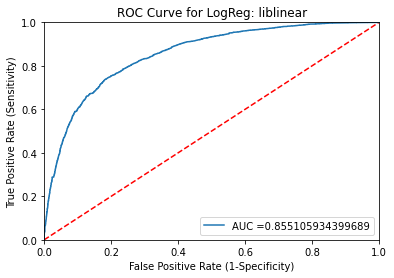

In [111]:
#ROC Curve
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [112]:
df.booking_status.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [113]:
#____________________SMOTE 

can = df[df.booking_status == 0] #11885
notcan = df[df.booking_status == 1] #24390
#__________________________________ oversample minority_with replacement
from sklearn.utils import resample
can_oversample = resample(can,replace=True,n_samples=len(notcan),random_state=27) 


In [114]:
can_oversample.shape

(24390, 18)

In [115]:
# combine majority and oversampled minority

dfsmote = pd.concat([notcan, can_oversample]) 
dfsmote.booking_status.value_counts()

1    24390
0    24390
Name: booking_status, dtype: int64

In [116]:
#___________________lets re do log reg
# X and y
X2 = dfsmote.loc[:, dfsmote.columns != 'booking_status']
y2 = dfsmote.loc[:, dfsmote.columns == 'booking_status']
y2.value_counts() 


booking_status
0                 24390
1                 24390
dtype: int64

In [117]:
# solver = liblinear

In [118]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='liblinear', random_state=0)
model2.fit(X2, y2)
model2.intercept_
model2.coef_

C:\Users\syeda\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.0469633 , -0.03601988, -0.15642001, -0.05175031,  0.29685209,
         1.62707245,  0.06635763, -0.01545213,  0.00311067,  0.05994817,
        -0.00565915, -1.06860104,  0.4185857 , -0.00302921,  0.05731551,
        -0.02102028,  1.33807454]])

In [119]:
#Predictions
y_pred2 = model2.predict(X2)

In [120]:
#Confusion matrix with smote
#there is imporvement after smote
from sklearn import metrics
cm2 = metrics.confusion_matrix(y2, y_pred2)
print(cm2)

[[18754  5636]
 [ 5459 18931]]


In [121]:
#Accuracy Score - correct predictions / total number of data points
model2.score(X2,y2) #WITH SMOTE = 
#print(18793+18931)/(18793+5597+5459+118931) # 0.75

0.772550225502255

In [122]:
(18793+18931)/(18793+5597+5459+18931) 

0.7733497334973349

In [123]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     24390
           1       0.77      0.78      0.77     24390

    accuracy                           0.77     48780
   macro avg       0.77      0.77      0.77     48780
weighted avg       0.77      0.77      0.77     48780



In [124]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob2 = model2.predict_proba(X2)
fpr2, tpr2, thresholds2 =roc_curve(dfsmote["booking_status"], y_pred_prob2[:,1])
roc_auc2 = auc(fpr2, tpr2) #Area under Curve


In [125]:
print(roc_auc2) # 0.82, same as without smote

0.8544144388348353


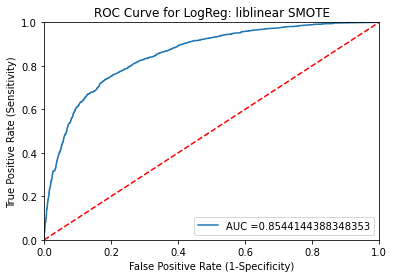

In [126]:
#ROC Curve
plt.title('ROC Curve for LogReg: liblinear SMOTE')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr2, tpr2, label = 'AUC =' +str(roc_auc2))
plt.legend(loc=4) #Location of label
plt.show()

GLM_Method

In [127]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int8   
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [129]:
modelGLM = smf.glm(formula='booking_status ~ no_of_adults+no_of_children+no_of_weekend_nights+no_of_week_nights+type_of_meal_plan+required_car_parking_space+room_type_reserved+lead_time+arrival_year+arrival_month+arrival_date+market_segment_type+repeated_guest+no_of_previous_cancellations+no_of_previous_bookings_not_canceled+avg_price_per_room+no_of_special_requests', data=df , family = sm.families.Binomial())

In [130]:
result = modelGLM.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         booking_status   No. Observations:                36275
Model:                            GLM   Df Residuals:                    36257
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15779.
Date:                Wed, 15 Mar 2023   Deviance:                       31559.
Time:                        22:30:59   Pearson chi2:                 4.37e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3263
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [131]:
prediction = result.predict()
#prediction with >0.05 P- values

In [132]:
prediction_nominal = [0 if x < 0.5 else 1 for x in prediction]
prediction_nominal

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [133]:
# confusion matrix 
from sklearn.metrics import confusion_matrix , classification_report

print(confusion_matrix(df['booking_status'] , prediction_nominal))

#with smote
#[[18793  5597]
 #[ 5459 18931]]

#without smote

#[[ 7260  4625]
# [ 2628 21762]]

#GLM matrix with high p-values
#[[ 7333  4552]
 #[ 2664 21726]]


[[ 7333  4552]
 [ 2664 21726]]


In [134]:
# ROC and AUC curve

from sklearn.metrics import roc_curve , auc , roc_auc_score

fpr , tpr ,threshold = roc_curve(df['booking_status'],prediction_nominal)

roc_auc = auc(fpr ,tpr) # Area under curve
print(roc_auc)

0.7538855607319221


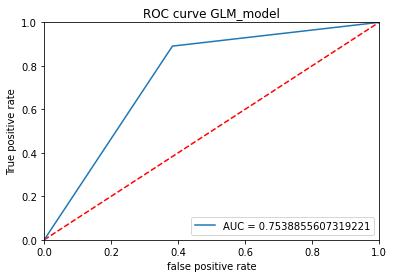

In [135]:
plt.title('ROC curve GLM_model')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr , tpr , label = 'AUC = ' + str(roc_auc))
plt.legend(loc=4)
plt.show()

In [136]:
print(classification_report(df['booking_status'] , prediction_nominal ,digits= 2))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67     11885
           1       0.83      0.89      0.86     24390

    accuracy                           0.80     36275
   macro avg       0.78      0.75      0.76     36275
weighted avg       0.80      0.80      0.80     36275



In [137]:
#Remove P-values more than 0.05


In [138]:
df1 = df.drop(['no_of_adults', 'no_of_children','no_of_previous_bookings_not_canceled'] , axis= 1)

In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_weekend_nights          36275 non-null  int64  
 1   no_of_week_nights             36275 non-null  int64  
 2   type_of_meal_plan             36275 non-null  int64  
 3   required_car_parking_space    36275 non-null  int64  
 4   room_type_reserved            36275 non-null  int8   
 5   lead_time                     36275 non-null  float64
 6   arrival_year                  36275 non-null  int64  
 7   arrival_month                 36275 non-null  int64  
 8   arrival_date                  36275 non-null  int64  
 9   market_segment_type           36275 non-null  int8   
 10  repeated_guest                36275 non-null  int64  
 11  no_of_previous_cancellations  36275 non-null  int64  
 12  avg_price_per_room            36275 non-null  float64
 13  n

In [140]:
modelGLM = smf.glm(formula= 'booking_status ~ no_of_weekend_nights+no_of_week_nights+type_of_meal_plan+required_car_parking_space+room_type_reserved+lead_time+arrival_year+arrival_month+arrival_date+market_segment_type+repeated_guest+no_of_previous_cancellations+avg_price_per_room+no_of_special_requests', data=df1 , family = sm.families.Binomial())

In [141]:
result = modelGLM.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         booking_status   No. Observations:                36275
Model:                            GLM   Df Residuals:                    36260
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15781.
Date:                Wed, 15 Mar 2023   Deviance:                       31561.
Time:                        22:31:00   Pearson chi2:                 4.35e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3263
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [142]:
prediction2 = result.predict()

In [143]:
prediction_nominal2 = [0 if x < 0.5 else 1 for x in prediction]
prediction_nominal2

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [144]:
# confusion matrix 
from sklearn.metrics import confusion_matrix , classification_report

print(confusion_matrix(df1['booking_status'] , prediction_nominal2))


#with smote
#[[18793  5597]
 #[ 5459 18931]]

#without smote

#[[ 7260  4625]
# [ 2628 21762]]

#GLM matrix with high p-values
#[[ 7333  4552]
 #[ 2664 21726]]

#GLM matrix without high p-values
#[[ 7333  4552]
# [ 2664 21726]]


[[ 7333  4552]
 [ 2664 21726]]


In [145]:
# ROC and AUC curve

from sklearn.metrics import roc_curve , auc , roc_auc_score

fpr3 , tpr3 ,threshold3 = roc_curve(df1['booking_status'],prediction_nominal2)

roc_auc3 = auc(fpr3 ,tpr3) # Area under curve
print(roc_auc3)

0.7538855607319221


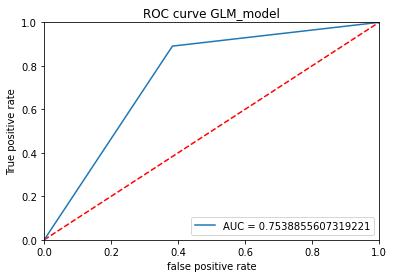

In [146]:
plt.title('ROC curve GLM_model')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr3 , tpr3 , label = 'AUC = ' + str(roc_auc3))
plt.legend(loc=4)
plt.show()

In [147]:
print(classification_report(df1['booking_status'] , prediction_nominal2 ,digits= 2))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67     11885
           1       0.83      0.89      0.86     24390

    accuracy                           0.80     36275
   macro avg       0.78      0.75      0.76     36275
weighted avg       0.80      0.80      0.80     36275



Decision Tree

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int8   
 7   lead_time                             36275 non-null  float64
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [149]:
df.shape

(36275, 18)

In [150]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
y = df.iloc[:, 17]

In [151]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int8

In [152]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.3 , random_state= 15)

In [153]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 40)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [154]:
y_train_pred= tree.predict(X_train)

In [155]:
y_test_pred= tree.predict(X_test)

In [156]:
#OAA 
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_train,y_train_pred),2))
print(round(accuracy_score(y_test,y_test_pred),2))

0.99
0.87


In [157]:
#right depth?
depth=[1,2,3,4,5,6,7,8,9]
accuracy_train, accuracy_test=[],[]

In [158]:
for i in depth:
    tree=DecisionTreeClassifier(max_depth=i)
    
    tree.fit(X_train, y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

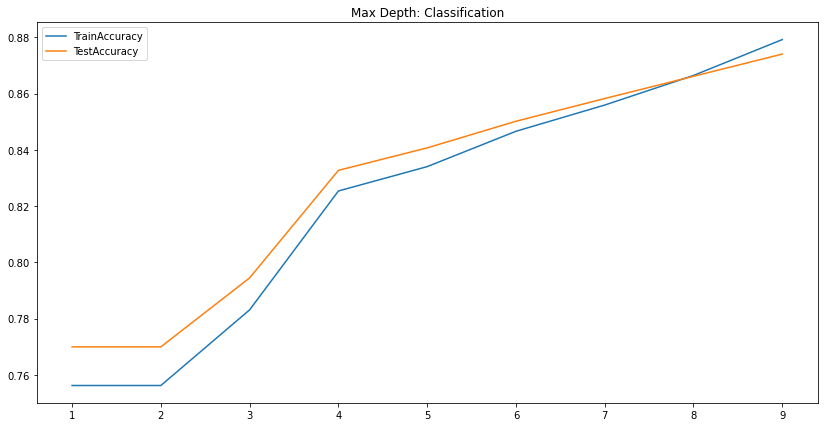

In [159]:
#Plotting for scores
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train, x= depth, label='TrainAccuracy')
sns.lineplot(y=accuracy_test, x=depth, label='TestAccuracy')
plt.title('Max Depth: Classification')
plt.show()

In [160]:
#________building tree with 8 depth
from sklearn.metrics import accuracy_score
 
tree1=DecisionTreeClassifier(max_depth=8)
    
tree1.fit(X_train, y_train)
y_train_pred1=tree1.predict(X_train)
y_test_pred1=tree1.predict(X_test)
    
print(round(accuracy_score(y_train, y_train_pred1),2))
print(round(accuracy_score(y_test, y_test_pred1),2))


0.87
0.87


Random forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10,
                                       n_estimators=100, oob_score=True)

In [163]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, oob_score=True, random_state=42)

In [164]:
# checking the oob score
classifier_rf.oob_score_

0.8738972904851922

Random forest classifer

In [165]:

from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9060920702012313

RF score :0.9055407516309841


Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [166]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [167]:
params = {
    'max_depth': [2,3,5,10],
    'max_features': [0.25, 5,0.75, 1.0],
    'n_estimators': [50,100,150]}

In [168]:
from sklearn.model_selection import GridSearchCV


In [169]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [170]:
clf=GridSearchCV(rf_model, params, cv=5)

In [171]:
model=clf.fit(X,y)

In [172]:
from pprint import pprint

In [173]:
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.75,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Another method of Grid search 

In [174]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [175]:
from sklearn.model_selection import GridSearchCV


In [176]:
params = {
    'bootstrap':[True],
    'max_depth': [2,3,5,10],
    'max_features': ['auto','log2'],
    'n_estimators': [20,40,60,80,100,120,140]}

In [177]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [178]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 56 candidates, totalling 224 fits
CPU times: total: 3.17 s
Wall time: 39.2 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 3, 5, 10],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140]},
             scoring='accuracy', verbose=1)

In [179]:
grid_search.best_score_

0.8746455576559546

In [180]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, n_estimators=60, n_jobs=-1,
                       random_state=42)

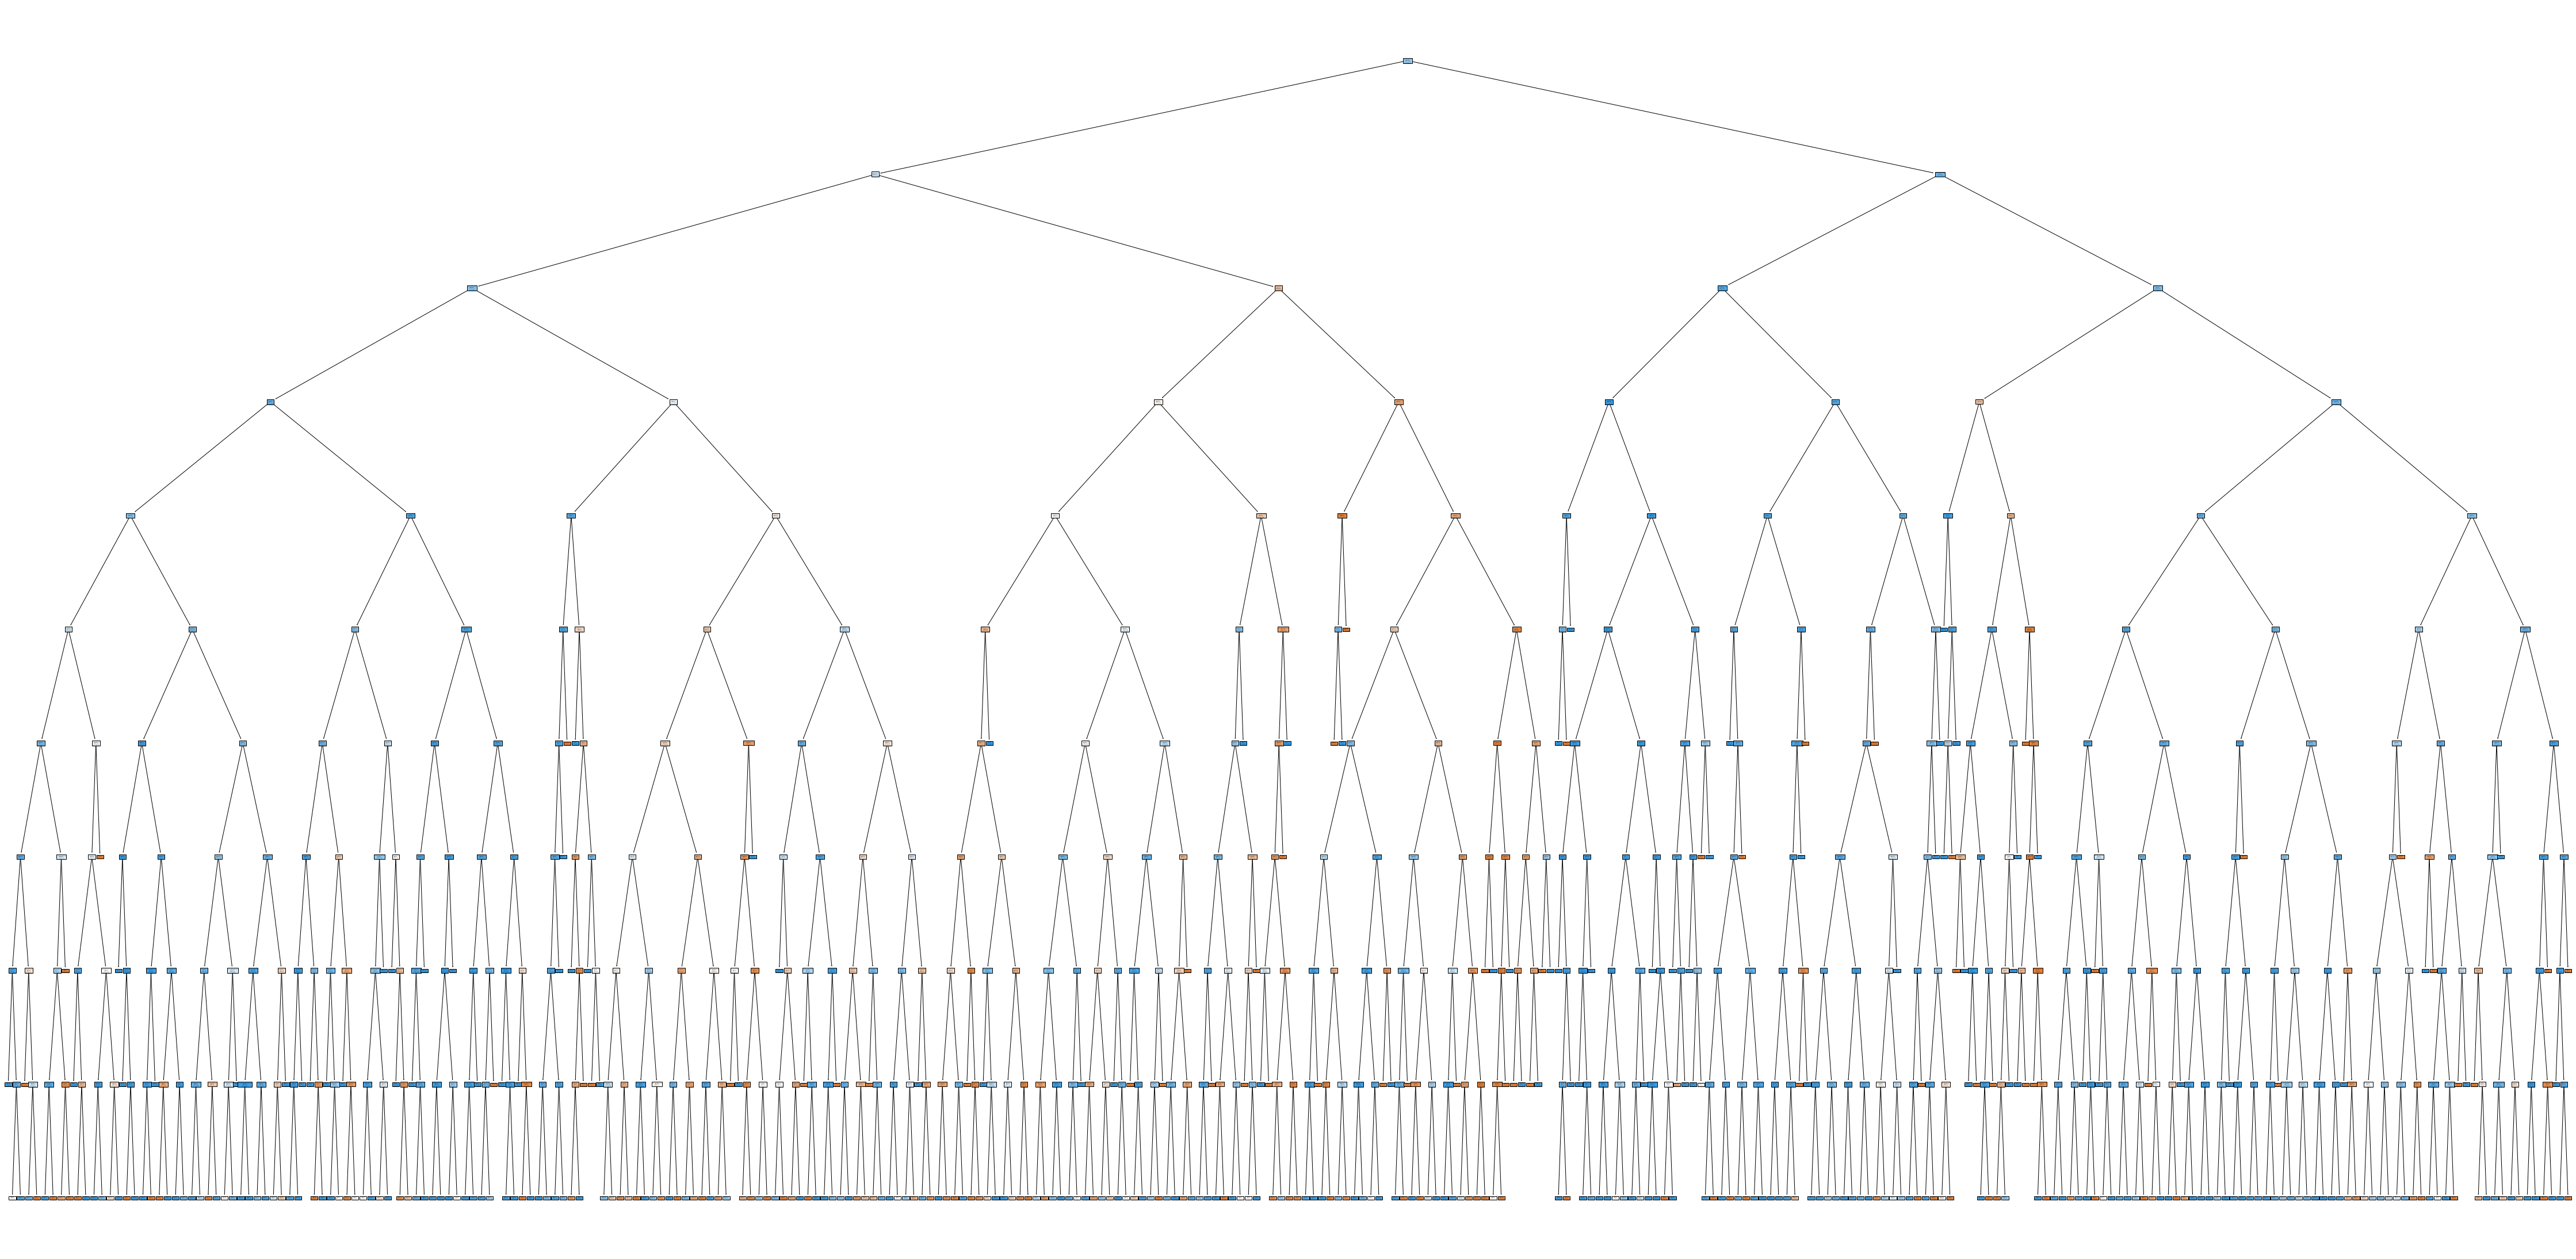

In [181]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[10], feature_names = X.columns,class_names=['Indp_variables', "booking_status"],filled=True);

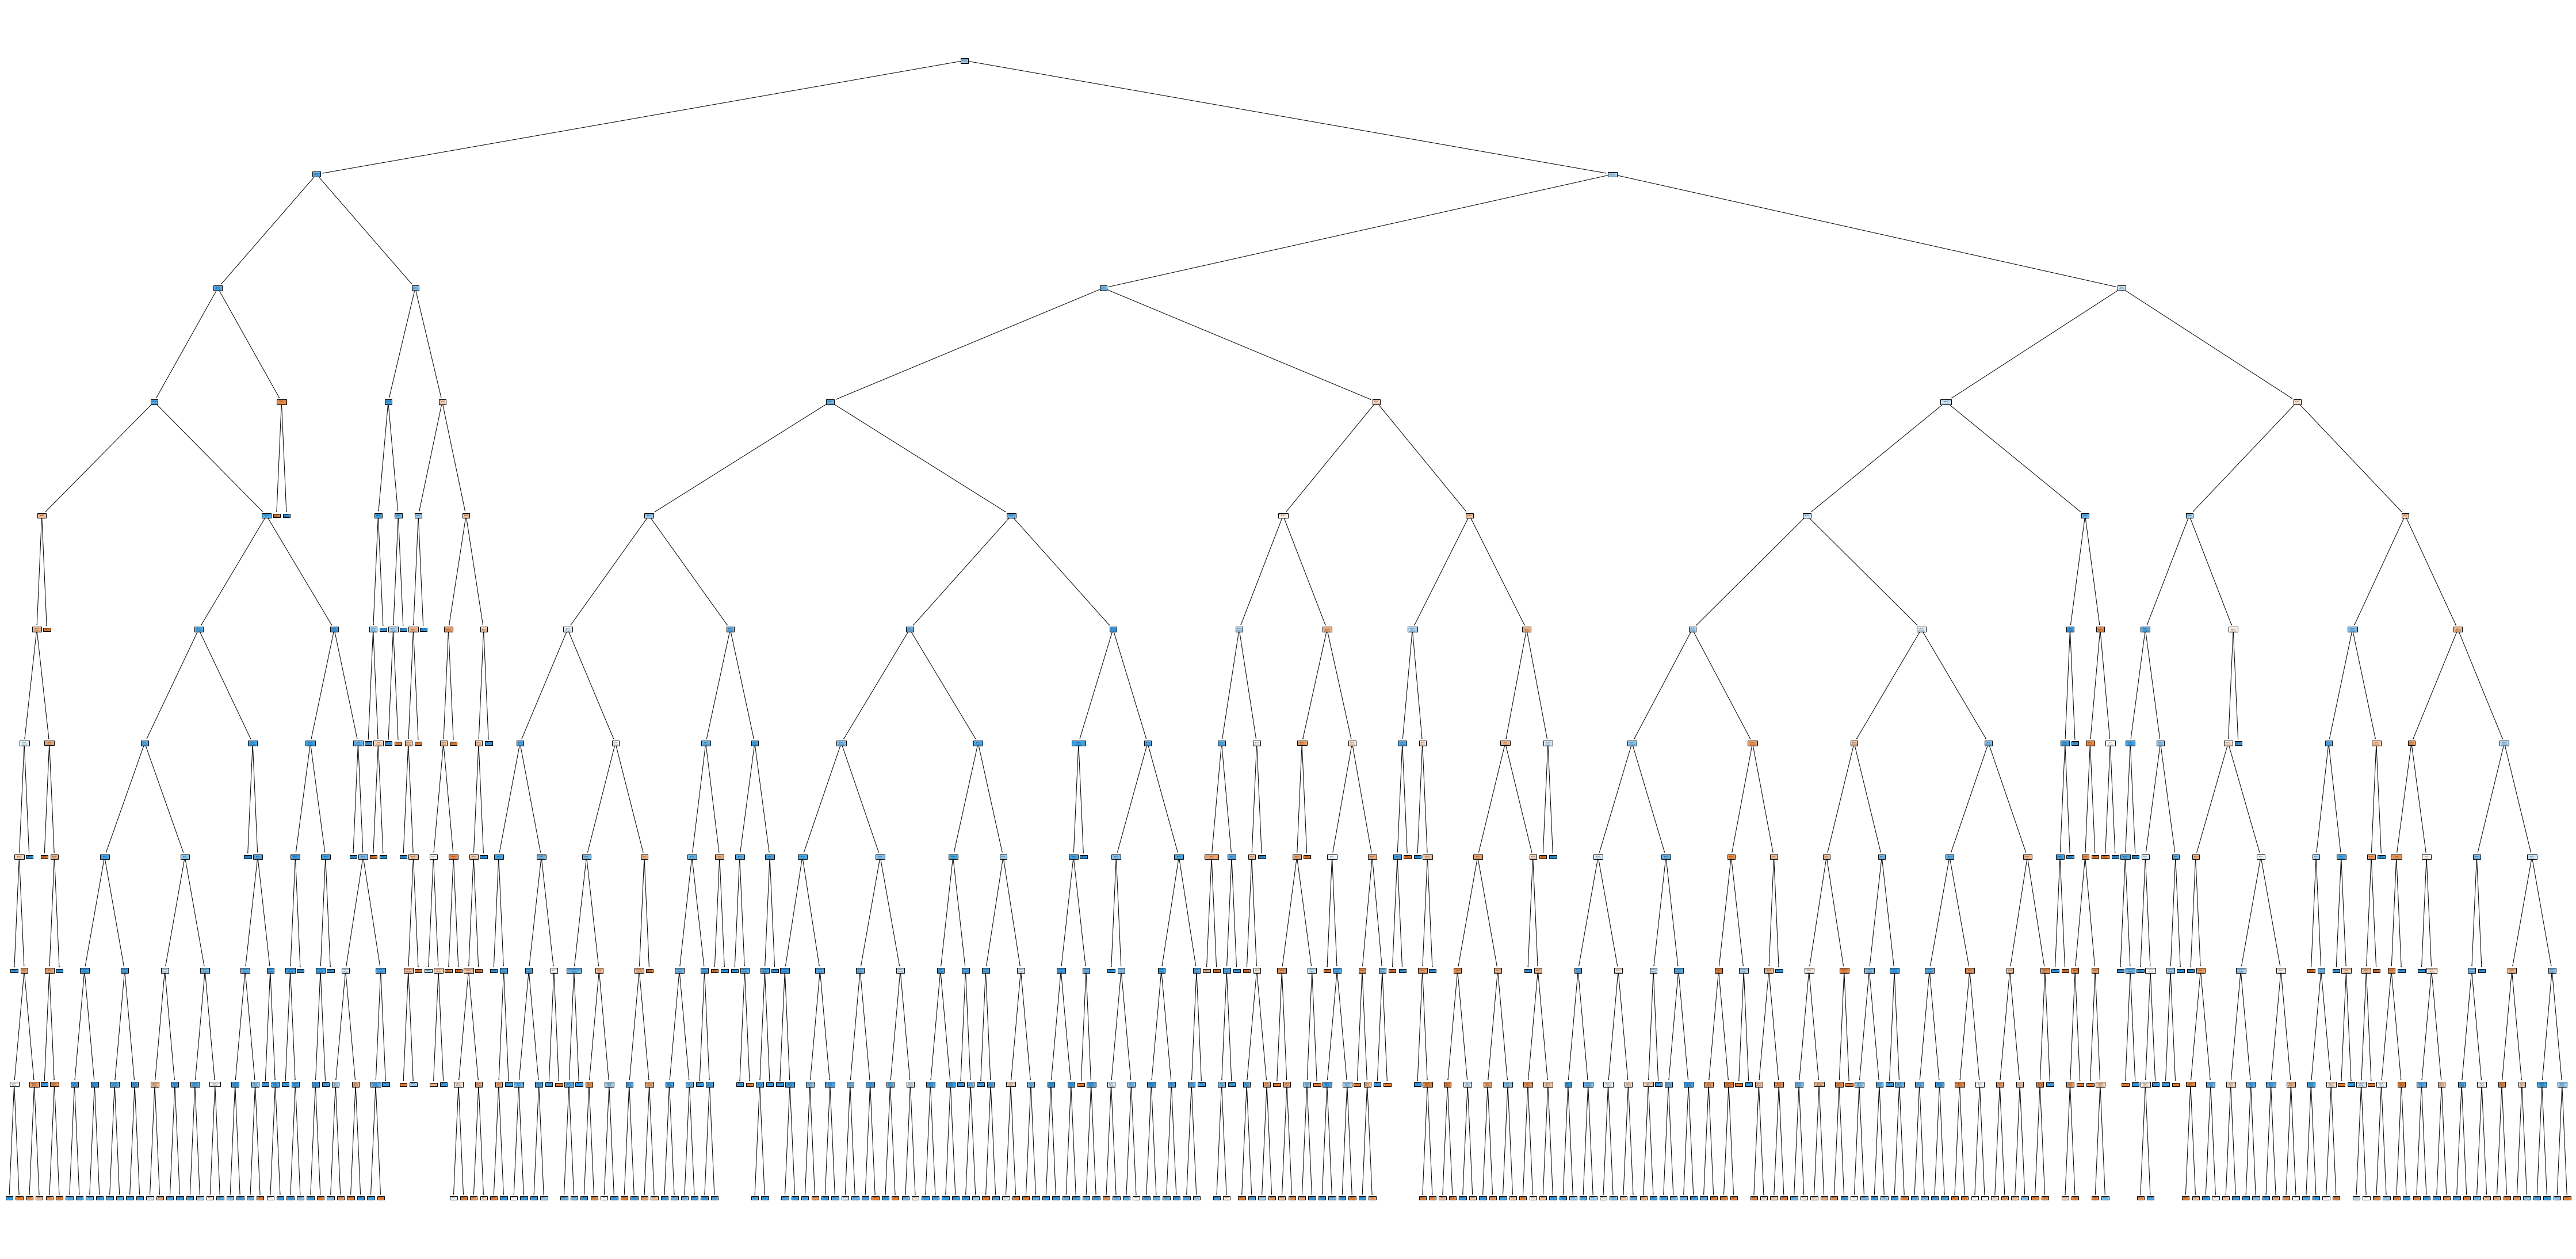

In [182]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Indp_variables', "booking_status"],filled=True);

Feature importance

In [183]:
rf_best.feature_importances_

array([2.02410082e-02, 3.48036992e-03, 2.63213536e-02, 2.54522437e-02,
       2.31463808e-02, 6.73397726e-03, 9.25828379e-03, 3.74628921e-01,
       4.44217237e-02, 6.08730279e-02, 3.01166682e-02, 8.79561517e-02,
       4.39143913e-03, 3.47674113e-04, 2.21551634e-03, 1.23329766e-01,
       1.57085495e-01])

In [184]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [185]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
7,lead_time,0.374629
16,no_of_special_requests,0.157085
15,avg_price_per_room,0.123330
11,market_segment_type,0.087956
9,arrival_month,0.060873
8,arrival_year,0.044422
10,arrival_date,0.030117
2,no_of_weekend_nights,0.026321
3,no_of_week_nights,0.025452
4,type_of_meal_plan,0.023146


SVM

In [186]:
#Building the model 
#SVC - Suppot Vector Classifier
from sklearn import svm
from sklearn.svm import SVC

svcT = svm.SVC(kernel = 'linear', C=1, gamma = 'auto', probability = True).fit(X_train, y_train)

In [187]:
print(svcT)

SVC(C=1, gamma='auto', kernel='linear', probability=True)


In [188]:
#Prediction
y_pred= svcT.predict(X_test)

In [189]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [190]:
#Confusion Matrix & Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.68      0.68      3428
           1       0.85      0.86      0.86      7455

    accuracy                           0.80     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.80      0.80      0.80     10883



In [191]:
#Roc curve
preds1= svcT.predict_proba(X_test)[:,1]

In [192]:
preds1.shape

(10883,)

In [193]:
#finding fpr, tpr & thresholds
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

In [194]:
fpr

array([0.        , 0.32205368, 1.        ])

In [195]:
tpr

array([0.        , 0.85754527, 1.        ])

In [196]:
thresholds

array([2, 1, 0], dtype=int8)

In [197]:
df1= pd.DataFrame(dict(fpr=fpr, tpr=tpr))

In [198]:
auc = metrics.auc(fpr,tpr)

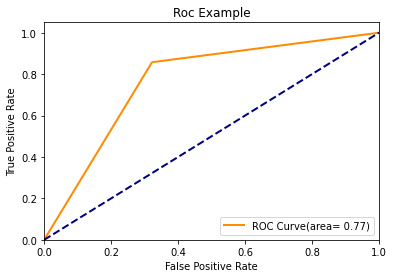

In [199]:
#ROC Curve
lw=2
plt.plot(fpr, tpr, color = 'darkorange', lw=lw, label = 'ROC Curve(area= %0.2f)'%auc)
plt.plot([0,1],[0,1], color= 'navy', lw=lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Example')
plt.legend(loc = 'lower right')
plt.show()




In [200]:
from sklearn.svm import SVR

In [201]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [202]:
svr_lin=SVR(kernel='linear', C=1e3)

In [203]:
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)

In [204]:
y_rbf

array([0.90006344, 0.48545409, 0.62020149, ..., 0.88675076, 0.81547451,
       0.89993749])

In [205]:
y_lin= svr_lin.fit(X_train, y_train).predict(X_test)

In [206]:
y_lin

array([-16585.80402324,  50170.98030331, -75926.3590121 , ...,
        80220.35933354, -37367.25672481, -35217.48651455])